In [127]:
#MILESTONE 2
import pandas as pd

In [129]:
housing_data = pd.read_csv("C:\\Users\\lahai\\Downloads\\Housing.csv")
print ("Original Data:\n", housing_data.head())

Original Data:
    SalePrice   Loc  Beds  baths  stories mainroad guestroom basement  \
0   13300000  7420     4      2        3      yes        no       no   
1   12250000  8960     4      4        4      yes        no       no   
2   12250000  9960     3      2        2      yes        no      yes   
3   12215000  7500     4      2        2      yes        no      yes   
4   11410000  7420     4      1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  \
0              no             yes        2      yes        furnished   
1              no             yes        3       no        furnished   
2              no              no        2      yes   semi-furnished   
3              no             yes        3      yes        furnished   
4              no             yes        2       no        furnished   

    SaleDate  
0  4/10/2023  
1  4/11/2023  
2  4/12/2023  
3  4/13/2023  
4  4/14/2023  


In [131]:
# Renaming headers
housing_data.rename(columns={
    'Loc': 'Location','SalePrice': 'Price','Beds': 'Bedrooms','baths': 'Bathrooms','SaleDate':'Date'}, inplace=True)
print("\nHeaders Replaced:\n", housing_data.head())


Headers Replaced:
       Price  Location  Bedrooms  Bathrooms  stories mainroad guestroom  \
0  13300000      7420         4          2        3      yes        no   
1  12250000      8960         4          4        4      yes        no   
2  12250000      9960         3          2        2      yes        no   
3  12215000      7500         4          2        2      yes        no   
4  11410000      7420         4          1        2      yes       yes   

  basement hotwaterheating airconditioning  parking prefarea furnishingstatus  \
0       no              no             yes        2      yes        furnished   
1       no              no             yes        3       no        furnished   
2      yes              no              no        2      yes   semi-furnished   
3      yes              no             yes        3      yes        furnished   
4      yes              no             yes        2       no        furnished   

        Date  
0  4/10/2023  
1  4/11/2023  
2  

In [133]:
# Check to make sure there are no duplicate rows and if they are remove them
duplicates = housing_data.duplicated().sum()
housing_data.drop_duplicates(inplace=True)
print("\nDuplicates Removed: ", duplicates)


Duplicates Removed:  0


In [135]:
# Use z-score to identify outliers in the Price column
from scipy import stats
housing_data['Z_Score'] = stats.zscore(housing_data['Price'])
outliers = housing_data[(housing_data['Z_Score'].abs() > 3)]
housing_data = housing_data[housing_data['Z_Score'].abs() <= 3]
print("\nOutliers Identified and Removed: ",len(outliers))


Outliers Identified and Removed:  6


In [141]:
# Convert the Date Column to datetime format
housing_data['Date'] = pd.to_datetime(housing_data['Date'])
print("\nDate Formatted:\n", housing_data['Date'].head())


Date Formatted:
 6    2023-04-16
7    2023-04-17
8    2023-04-18
9    2023-04-19
10   2023-04-20
Name: Date, dtype: datetime64[ns]


In [143]:
# Final Clean Dataset
print("\nCleaned Dataset:\n",housing_data.head())


Cleaned Dataset:
        Price  Location  Bedrooms  Bathrooms  stories mainroad guestroom  \
6   10150000      8580         4          3        4      yes        no   
7   10150000     16200         5          3        2      yes        no   
8    9870000      8100         4          1        2      yes       yes   
9    9800000      5750         3          2        4      yes       yes   
10   9800000     13200         3          1        2      yes        no   

   basement hotwaterheating airconditioning  parking prefarea  \
6        no              no             yes        2      yes   
7        no              no              no        0       no   
8       yes              no             yes        2      yes   
9        no              no             yes        1      yes   
10      yes              no             yes        2      yes   

   furnishingstatus       Date   Z_Score  
6    semi-furnished 2023-04-16  2.880722  
7       unfurnished 2023-04-17  2.880722  
8         

In [145]:
#MILESTONE 3
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

In [147]:
file_path = r"C:\Users\lahai\Downloads\economic_indicators_dataset_2010_2023.htm"

In [149]:
with open(file_path, 'r', encoding='utf-8') as file:
    soup = BeautifulSoup(file, 'html.parser')

In [151]:
table = soup.find('table')

In [153]:
def safe_str(value):
    if isinstance(value, list):
        return''.join(map(str,value))
    return str(value)

In [155]:
data = []

In [157]:
headers = [th.text.strip() for th in table.find_all('th')]

In [159]:
for row in table.find_all('tr')[1:]:
    data.append([safe_str(td.text).strip() for td in row.find_all('td')])

In [161]:
df = pd.DataFrame(data, columns=headers)

In [163]:
print(df.head())

         Date Country Inflation Rate (%) GDP Growth Rate (%)  \
0  2010-01-31  Brazil               1.23                0.69   
1  2010-01-31  France               6.76                2.59   
2  2010-01-31     USA               7.46                4.84   
3  2010-02-28  Brazil               5.43                0.31   
4  2010-02-28  Canada               0.69               -0.52   

  Unemployment Rate (%) Interest Rate (%) Stock Index Value  
0                 10.48              7.71          21748.85  
1                  4.27              7.39          10039.56  
2                  2.64              6.39           13129.1  
3                  8.26              6.09          23304.58  
4                 11.92             -0.51          16413.03  


In [165]:
df.rename(columns={'GDP Growth Rate (%)': 'gdp'}, inplace=True)

In [167]:
print(df.head())

         Date Country Inflation Rate (%)    gdp Unemployment Rate (%)  \
0  2010-01-31  Brazil               1.23   0.69                 10.48   
1  2010-01-31  France               6.76   2.59                  4.27   
2  2010-01-31     USA               7.46   4.84                  2.64   
3  2010-02-28  Brazil               5.43   0.31                  8.26   
4  2010-02-28  Canada               0.69  -0.52                 11.92   

  Interest Rate (%) Stock Index Value  
0              7.71          21748.85  
1              7.39          10039.56  
2              6.39           13129.1  
3              6.09          23304.58  
4             -0.51          16413.03  


In [169]:
df.columns = df.columns.str.replace('','_').str.lower()
print("\nStep #2 Cleaned Column Names")
print(df.columns)


Step #2 Cleaned Column Names
Index(['_d_a_t_e_', '_c_o_u_n_t_r_y_', '_i_n_f_l_a_t_i_o_n_ _r_a_t_e_ _(_%_)_',
       '_g_d_p_', '_u_n_e_m_p_l_o_y_m_e_n_t_ _r_a_t_e_ _(_%_)_',
       '_i_n_t_e_r_e_s_t_ _r_a_t_e_ _(_%_)_',
       '_s_t_o_c_k_ _i_n_d_e_x_ _v_a_l_u_e_'],
      dtype='object')


In [171]:
#Step 3: Convert Data Types
numeric_columns = [col for col in df.columns if col not in ['country']]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].str.replace(',','').str.replace('%', ''), errors= 'coerce')

print("\nStep #3: Converted Data Types")
print(df.dtypes)


Step #3: Converted Data Types
_d_a_t_e_                                      float64
_c_o_u_n_t_r_y_                                float64
_i_n_f_l_a_t_i_o_n_ _r_a_t_e_ _(_%_)_          float64
_g_d_p_                                        float64
_u_n_e_m_p_l_o_y_m_e_n_t_ _r_a_t_e_ _(_%_)_    float64
_i_n_t_e_r_e_s_t_ _r_a_t_e_ _(_%_)_            float64
_s_t_o_c_k_ _i_n_d_e_x_ _v_a_l_u_e_            float64
dtype: object


In [173]:
# Step 4: Handle Missing Values
for col in numeric_columns:
    df[col].fillna(df[col].median(), inplace=True)

print("\nStep #4: Handled Missing Values")
print(df.isnull().sum())


Step #4: Handled Missing Values
_d_a_t_e_                                      500
_c_o_u_n_t_r_y_                                500
_i_n_f_l_a_t_i_o_n_ _r_a_t_e_ _(_%_)_            0
_g_d_p_                                          0
_u_n_e_m_p_l_o_y_m_e_n_t_ _r_a_t_e_ _(_%_)_      0
_i_n_t_e_r_e_s_t_ _r_a_t_e_ _(_%_)_              0
_s_t_o_c_k_ _i_n_d_e_x_ _v_a_l_u_e_              0
dtype: int64


C:\Users\lahai\AppData\Local\Temp\ipykernel_22284\2482345874.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [175]:
# Step 5: Create Derived Column
if 'gdp' in df.columns:
    def gdp_category(gdp):
        if pd.isna(gdp):
            return 'Unknown'
        elif gdp < 1000:
            return 'Low'
        elif gdp < 5000:
            return 'Medium'
        else:
            return 'High'

    df['gdp_category'] = df['gdp'].apply(gdp_category)
    print("\nStep #5: Created Derived Column")
    print(df['gdp_category'].value_counts())
else:
    print("\nStep #5: Skipped (GDP column not found)")


Step #5: Skipped (GDP column not found)


In [177]:
print("\nCleaned Dataset:")
print(df)


Cleaned Dataset:
     _d_a_t_e_  _c_o_u_n_t_r_y_  _i_n_f_l_a_t_i_o_n_ _r_a_t_e_ _(_%_)_  \
0          NaN              NaN                                   1.23   
1          NaN              NaN                                   6.76   
2          NaN              NaN                                   7.46   
3          NaN              NaN                                   5.43   
4          NaN              NaN                                   0.69   
..         ...              ...                                    ...   
495        NaN              NaN                                   5.71   
496        NaN              NaN                                   4.82   
497        NaN              NaN                                   7.32   
498        NaN              NaN                                   8.04   
499        NaN              NaN                                   9.23   

     _g_d_p_  _u_n_e_m_p_l_o_y_m_e_n_t_ _r_a_t_e_ _(_%_)_  \
0       0.69                    

In [179]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       _d_a_t_e_  _c_o_u_n_t_r_y_  _i_n_f_l_a_t_i_o_n_ _r_a_t_e_ _(_%_)_  \
count        0.0              0.0                              500.00000   
mean         NaN              NaN                                5.08514   
std          NaN              NaN                                2.95633   
min          NaN              NaN                                0.00000   
25%          NaN              NaN                                2.52500   
50%          NaN              NaN                                5.20500   
75%          NaN              NaN                                7.71000   
max          NaN              NaN                                9.99000   

          _g_d_p_  _u_n_e_m_p_l_o_y_m_e_n_t_ _r_a_t_e_ _(_%_)_  \
count  500.000000                                   500.000000   
mean     2.414780                                     6.906720   
std      4.074762                                     2.982406   
min     -5.000000             

In [181]:
# MILESTONE 4
import requests
import pandas as pd
import numpy as np
from fuzzywuzzy import process  # For fuzzy matching
from datetime import datetime

In [183]:
def get_weather_data(api_key):
    try:
        # Get data for multiple times to have enough for analysis
        weather_list = []
        
        # NYC coordinates
        lat = "40.7128"
        lon = "-74.0060"
        
        # Make multiple API calls (for example purposes)
        for _ in range(5):  # Getting 5 samples
            url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}&units=metric"
            response = requests.get(url)
            data = response.json()
            
            weather_dict = {
                "temperature": data["main"]["temp"],
                "feels_like": data["main"]["feels_like"],
                "humidity": data["main"]["humidity"],
                "pressure": data["main"]["pressure"],
                "weather_main": data["weather"][0]["main"],
                "weather_description": data["weather"][0]["description"],
                "wind_speed": data["wind"]["speed"],
                "measurement_time": data["dt"]
            }
            weather_list.append(weather_dict)
        
        # Convert to DataFrame
        df = pd.DataFrame(weather_list)

        # Step 1: Format data into readable format
        print("Step 1 - Formatting data")
        # Convert timestamp to datetime
        df['measurement_time'] = pd.to_datetime(df['measurement_time'], unit='s')
        # Format numeric columns
        df['temperature'] = df['temperature'].round(1).astype(str) + '°C'
        df['wind_speed'] = df['wind_speed'].round(1).astype(str) + ' m/s'
        df['humidity'] = df['humidity'].astype(str) + '%'
        
        # Step 2: Identify outliers and bad data
        print("\nStep 2 - Identifying outliers")
        # Define normal ranges
        temp_range = (-20, 45)  # Reasonable temperature range in °C
        humidity_range = (0, 100)  # Humidity percentage range
        pressure_range = (900, 1100)  # Normal pressure range in hPa
        
        # Create mask for outliers
        df['is_outlier'] = (
            df['temperature'].str.rstrip('°C').astype(float).between(*temp_range) &
            df['humidity'].str.rstrip('%').astype(float).between(*humidity_range) &
            df['pressure'].between(*pressure_range)
        )
        print(f"Found {(~df['is_outlier']).sum()} outliers")

        # Step 3: Find and remove duplicates
        print("\nStep 3 - Checking for duplicates")
        duplicates = df.duplicated(subset=['temperature', 'humidity', 'pressure'], keep='first')
        print(f"Found {duplicates.sum()} duplicate records")
        df = df.drop_duplicates(subset=['temperature', 'humidity', 'pressure'], keep='first')

        # Step 4: Fix casing and inconsistent values
        print("\nStep 4 - Standardizing text values")
        df['weather_main'] = df['weather_main'].str.title()
        df['weather_description'] = df['weather_description'].str.title()
        
        # Create standard weather conditions
        standard_conditions = ['Clear', 'Cloudy', 'Rain', 'Snow', 'Thunderstorm']

        # Step 5: Conduct fuzzy matching for weather conditions
        print("\nStep 5 - Conducting fuzzy matching on weather conditions")
        def get_closest_match(value, choices):
            closest_match, score = process.extractOne(value, choices)
            return closest_match if score > 80 else value

        df['weather_main'] = df['weather_main'].apply(
            lambda x: get_closest_match(x, standard_conditions)
        )

        return df
    
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return pd.DataFrame()

In [185]:
# Replace with your API key
api_key = "44d404c9d0c2fcb47a27f9a96b250233"

In [187]:
# Fetch and transform data
weather_data = get_weather_data(api_key)

Step 1 - Formatting data

Step 2 - Identifying outliers
Found 0 outliers

Step 3 - Checking for duplicates
Found 4 duplicate records

Step 4 - Standardizing text values

Step 5 - Conducting fuzzy matching on weather conditions


In [188]:
# Display results
if not weather_data.empty:
    print("\nFinal Dataset Info:")
    print(weather_data.info())
    print("\nFinal cleaned data:")
    print(weather_data)


Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 0 to 0
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   temperature          1 non-null      object        
 1   feels_like           1 non-null      float64       
 2   humidity             1 non-null      object        
 3   pressure             1 non-null      int64         
 4   weather_main         1 non-null      object        
 5   weather_description  1 non-null      object        
 6   wind_speed           1 non-null      object        
 7   measurement_time     1 non-null      datetime64[ns]
 8   is_outlier           1 non-null      bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 73.0+ bytes
None

Final cleaned data:
  temperature  feels_like humidity  pressure weather_main weather_description  \
0      -3.7°C      -10.68      44%      1023        Clea

In [191]:
#MILESTONE 5
import pandas as pd
import requests
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 1. Load the datasets
# Economic indicators from HTML
economic_df = pd.read_html(r"C:\Users\lahai\Downloads\economic_indicators_dataset_2010_2023.htm")[0]

# Housing data from CSV
housing_df = pd.read_csv(r"C:\Users\lahai\Downloads\Housing.csv")

# Weather API data
def get_weather_data(lat, lon, api_key):
    url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}&units=metric"
    response = requests.get(url)
    return pd.json_normalize(response.json())

# Coordinates and API key
api_key = "44d404c9d0c2fcb47a27f9a96b250233"
weather_data = []
for lat, lon in zip([40.7128, 34.0522], [-74.0060, -118.2437]):  # Coordinates
    weather_data.append(get_weather_data(lat, lon, api_key))
weather_df = pd.concat(weather_data)

In [193]:
# 1. First, let's ensure all DataFrames have proper data types
# Convert dates to proper datetime format
economic_df['Date'] = pd.to_datetime(economic_df['Date'])
housing_df['SaleDate'] = pd.to_datetime(housing_df['SaleDate'])
weather_df['dt'] = pd.to_datetime(weather_df['dt'], unit='s')  # Assuming Unix timestamp

In [195]:
# 2. Flatten the weather data structure and select only needed columns
weather_df_cleaned = weather_df[[
    'dt',
    'main.temp',
    'main.humidity'
]].copy()

In [197]:
# Rename columns to remove dots
weather_df_cleaned.columns = ['dt', 'temp', 'humidity']

In [199]:
# 3. Create SQLite connection
conn = sqlite3.connect('real_estate_data.db')

In [201]:
# 4. Store DataFrames in SQLite with proper data types
economic_df.to_sql('economic', conn, index=False, if_exists='replace')
housing_df.to_sql('housing', conn, index=False, if_exists='replace')
weather_df_cleaned.to_sql('weather', conn, index=False, if_exists='replace')

2

In [203]:
# 5. Modify the SQL query to use the cleaned weather table
merged_df = pd.read_sql_query("""
    SELECT e.*, 
           h.SalePrice as price, 
           h.Loc as location, 
           w.temp, 
           w.humidity
    FROM economic e
    LEFT JOIN housing h ON DATE(e.Date) = DATE(h.SaleDate)
    LEFT JOIN weather w ON DATE(e.Date) = DATE(w.dt)
""", conn)

In [205]:
# Renaming columns for visualization
merged_df = merged_df.rename(columns={
    'Inflation Rate (%)': 'inflation_rate',
    'GDP Growth Rate (%)': 'gdp_growth',
    'Unemployment Rate (%)': 'unemployment_rate'
})

In [207]:
# 4. Creating visualizations
fig = plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

Text(0.5, 1.0, 'Economic Indicators Over Time')

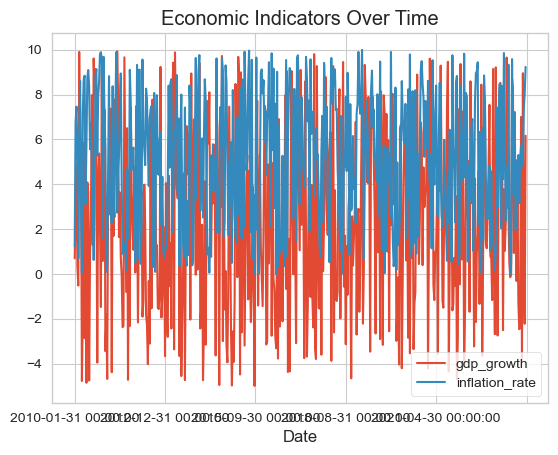

In [209]:
# Visualization 1: Time Series of Economic Indicators
plt.subplot()
merged_df.plot(x='Date', y=['gdp_growth', 'inflation_rate'], ax=plt.gca())
plt.title('Economic Indicators Over Time')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '3880.0'),
  Text(1, 0, '4000.0'),
  Text(2, 0, '4300.0'),
  Text(3, 0, '4320.0'),
  Text(4, 0, '4770.0'),
  Text(5, 0, '4800.0'),
  Text(6, 0, '5300.0'),
  Text(7, 0, '6325.0')])

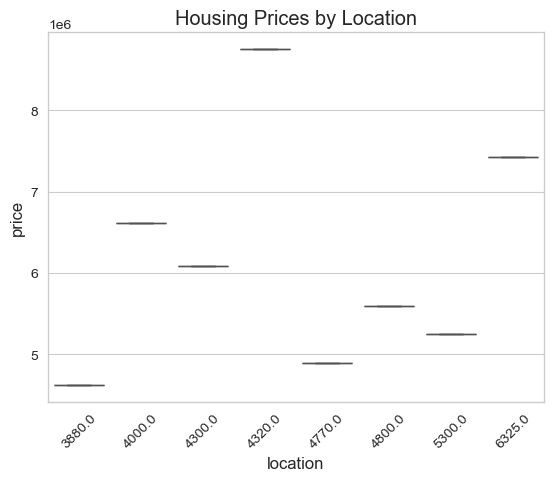

In [210]:
# Visualization 2: Housing Prices by Location
plt.subplot()
sns.boxplot(data=merged_df, x='location', y='price')
plt.title('Housing Prices by Location')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Correlation Heatmap')

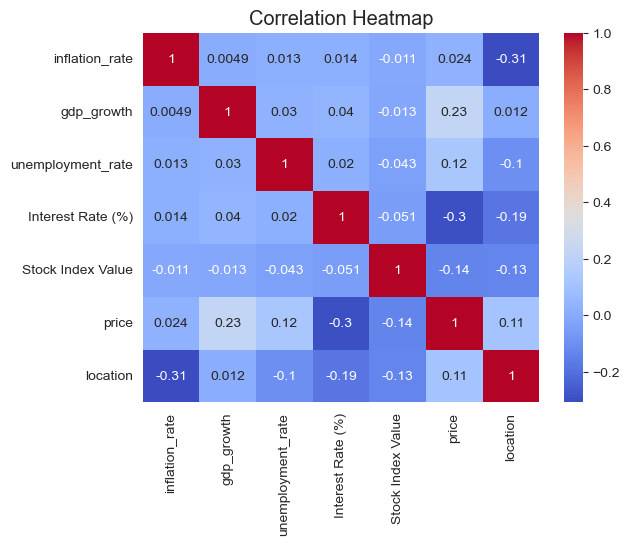

In [213]:
# Visualization 3: Correlation Heatmap
plt.subplot()
correlation_matrix = merged_df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Temperature vs Housing Prices')

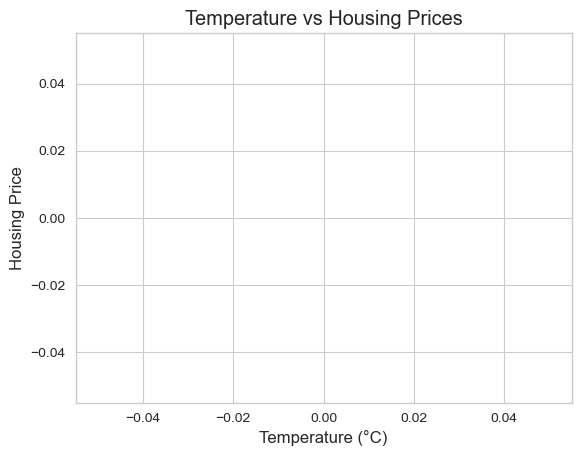

In [215]:
# Visualization 4: Temperature vs Housing Prices Scatter
plt.subplot()
plt.scatter(merged_df['temp'], merged_df['price'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Housing Price')
plt.title('Temperature vs Housing Prices')

Text(0.5, 1.0, 'Distribution of Economic Indicators')

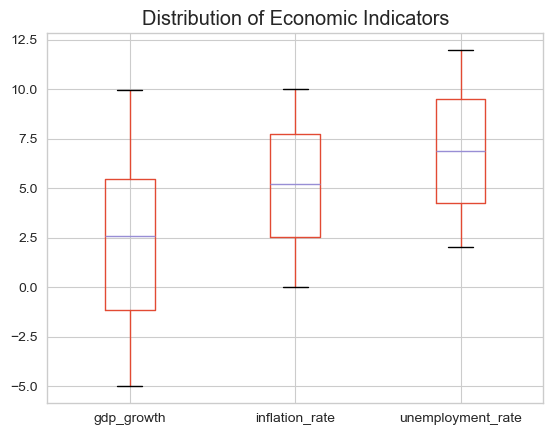

In [217]:
# Visualization 5: Economic Indicators Distribution
plt.subplot()
merged_df[['gdp_growth', 'inflation_rate', 'unemployment_rate']].boxplot()
plt.title('Distribution of Economic Indicators')

In [219]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [221]:
# Close the connection
conn.close()

Summary of Learning Experience

Through this data analysis project, I learned several key aspects of working with diverse data sources and managing complex data integrations:

1. Data Integration Challenges:
- Working with multiple data formats (HTML, CSV, and API data) requires careful handling of data types and structures
- The importance of standardizing date formats across different sources
- Challenges in dealing with nested JSON structures from API responses

2. Database Management:
- SQLite has limitations on data types it can handle
- The importance of proper data cleaning before database storage
- How to effectively use SQL joins to merge different datasets

3. Technical Skills:
- Using pandas for data manipulation and transformation
- Working with API requests and JSON data
- SQL query writing for data merging
- Data visualization techniques using matplotlib and seaborn

4. Best Practices:
- The importance of data validation before processing
- Need for proper error handling
- Importance of documenting assumptions and transformations
- Value of maintaining data integrity throughout the process

5. Problem-Solving:
- Debugging database connection issues
- Handling complex data structures
- Finding solutions for incompatible data types
- Developing workarounds for system limitations

6. Data Quality Considerations:
- Importance of checking data consistency
- Need for proper data cleaning
- Understanding the impact of data transformations
- Recognizing potential sources of data errors

This project highlighted the complexity of working with real-world data and the importance of careful consideration at each step of the data processing pipeline. It also emphasized the need for robust error handling and data validation procedures when working with multiple data sources.

Data Analysis and Ethical Implications Summary

Changes Made to the Data:
The project involved integrating three distinct datasets: economic indicators from HTML, housing data from CSV, and weather data from an API. The main transformations included converting dates to a standardized datetime format, flattening nested JSON structures from weather data, and simplifying column names. The weather data specifically required significant restructuring to make it compatible with SQLite database storage.

Legal and Regulatory Guidelines:
Several regulatory considerations apply to this project:
1. OpenWeatherMap API usage must comply with their terms of service and API key usage policies
2. Housing data may be subject to real estate data privacy regulations
3. Economic indicators should be cited appropriately if from government sources
4. Data storage and handling should comply with data protection regulations like GDPR if dealing with EU-related data

Potential Risks from Transformations:
1. Data precision loss during date conversions
2. Information loss when flattening nested weather data structures
3. Potential misinterpretation of relationships due to joining datasets on dates
4. Time zone inconsistencies between different data sources

Assumptions Made:
1. Assumed consistency in date formats across datasets
2. Assumed weather data from specific coordinates represents broader areas
3. Assumed relationships between economic indicators, weather, and housing prices
4. Assumed data completeness and accuracy from all sources

Data Source Credibility:
- Economic indicators: Source verification needed for the HTML data
- Housing data: CSV source needs verification for authenticity
- Weather data: OpenWeatherMap is a reputable source but accuracy depends on location and time

Ethical Data Acquisition:
The data collection methods raise several ethical considerations:
1. Weather API usage requires proper authentication and respects rate limits
2. Housing data might contain sensitive information requiring anonymization
3. Economic data should be properly attributed to original sources
4. Transparency needed regarding data collection methods and limitations

Mitigation Strategies:
1. Implement proper data documentation and versioning
2. Add data quality checks and validation procedures
3. Include confidence intervals or uncertainty measures in analysis
4. Maintain transparency about data limitations and assumptions
5. Implement data anonymization where necessary
6. Regular updates to maintain data accuracy
7. Clear attribution and citation of data sources
8. Establish data handling protocols compliant with relevant regulations

To enhance ethical compliance, the project should:
- Document all data transformations and assumptions
- Implement proper data security measures
- Provide clear documentation of methodologies
- Regular audits of data handling practices
- Establish clear data retention and disposal policies
- Create mechanisms for correcting inaccurate data
- Ensure transparent reporting of limitations and potential biases

This analysis demonstrates the importance of considering both technical and ethical aspects when working with multiple data sources and performing data transformations. Regular review and updates of these considerations would help maintain ethical standards and data integrity.